# Capstone project

# TMDB Movie Analysis

###### Importing necessary libraries

In [167]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler,normalize
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,precision_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [168]:
cr=pd.read_csv("C:/Users/saran/Downloads/DS_C14_Capstone_tmdb_5000_credits.csv")   # loading the two csv files into dataframes

mv=pd.read_csv("C:/Users/saran/Downloads/DS_C14_Capstone_tmdb_5000_movies.csv")

##### Exploring the two loaded datasets

In [169]:
cr.head(3)   

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [170]:
cr.shape

(4803, 4)

In [171]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

In [172]:
mv.head(3)

,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466


In [173]:
mv.shape

(4803, 18)

In [174]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  status                4803 non-null   object 
 14  tagline               3959 non-null   object 
 15  title                

##### Merging the two dataframes on common column

In [175]:
movie_df=cr.merge(mv,left_on='movie_id',right_on='id')
movie_df.head()

,movie_id,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [176]:
movie_df.rename(columns={'title_x':'title'}, inplace=True)  # renaming the duplicated title column name and dropping one
movie_df.drop(columns=['id','title_y'],inplace=True)

#### Dealing with the columns having records in JSON format

In [177]:
# converting the crew column from JSON to string and then extracting director name and creating a new colum.
movie_df['crew'] = movie_df['crew'].apply(json.loads)
movie_df['director'] = movie_df['crew'].apply(lambda x: [crew_member['name'] for crew_member in x if crew_member['job'] == 'Director'][0] if any(crew_member['job'] == 'Director' for crew_member in x) else None)
movie_df = movie_df.drop('crew', axis=1)


In [178]:
# converting the crew column from JSON to string and then extracting director name and creating new columns for cast 1 and cast2
movie_df['cast'] = movie_df['cast'].apply(json.loads)
movie_df['cast'] = movie_df['cast'].apply(lambda x: ', '.join([item['name'] for item in x]))
movie_df['cast 1'] = movie_df['cast'].str.split(', ').str[0]
movie_df['cast 2'] = movie_df['cast'].str.split(', ').str[1]

In [179]:
movie_df['genres'] = movie_df['genres'].apply(json.loads)
movie_df['genres'] = movie_df['genres'].apply(lambda x: ', '.join([item['name'] for item in x]))

movie_df['main genre'] = movie_df['genres'].str.split(', ').str[0]
movie_df['sub genre'] = movie_df['genres'].str.split(', ').str[1]

In [180]:
json_col = ['keywords', 'production_companies', 'production_countries']

for col in json_col:
    movie_df[col] = movie_df[col].apply(lambda x: [item['name'] for item in json.loads(x)])
    movie_df[col] = movie_df[col].str[0]  

In [181]:
movie_df.head()

,movie_id,title,cast,budget,genres,homepage,keywords,original_language,overview,popularity,...,runtime,status,tagline,vote_average,vote_count,director,cast 1,cast 2,main genre,sub genre
0,19995,Avatar,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,culture clash,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,Released,Enter the World of Pandora.,7.2,11800,James Cameron,Sam Worthington,Zoe Saldana,Action,Adventure
1,285,Pirates of the Caribbean: At World's End,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,ocean,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,Released,"At the end of the world, the adventure begins.",6.9,4500,Gore Verbinski,Johnny Depp,Orlando Bloom,Adventure,Fantasy
2,206647,Spectre,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,spy,en,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,Released,A Plan No One Escapes,6.3,4466,Sam Mendes,Daniel Craig,Christoph Waltz,Action,Adventure
3,49026,The Dark Knight Rises,"Christian Bale, Michael Caine, Gary Oldman, An...",250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,dc comics,en,Following the death of District Attorney Harve...,112.312950,...,165.0,Released,The Legend Ends,7.6,9106,Christopher Nolan,Christian Bale,Michael Caine,Action,Crime
4,49529,John Carter,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,based on novel,en,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,Released,"Lost in our world, found in another.",6.1,2124,Andrew Stanton,Taylor Kitsch,Lynn Collins,Action,Adventure


In [182]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4803 non-null   int64  
 1   title                 4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   budget                4803 non-null   int64  
 4   genres                4803 non-null   object 
 5   homepage              1712 non-null   object 
 6   keywords              4391 non-null   object 
 7   original_language     4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4452 non-null   object 
 11  production_countries  4629 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  status               

In [183]:
movie_df.keywords.value_counts()

based on novel                  94
independent film                87
new york                        73
london england                  61
prison                          60
                                ..
interracial relationship         1
indiana                          1
smuggling of arms                1
pain                             1
united states–mexico barrier     1
Name: keywords, Length: 1351, dtype: int64

In [184]:
movie_df['profit'] = movie_df['revenue'] - movie_df['budget']  #Adding a new column of profit
movie_df['profit'].head()

0    2550965087
1     661000000
2     635674609
3     834939099
4      24139100
Name: profit, dtype: int64

In [185]:
movie_df.isnull().sum()      #checking for null values

movie_id                   0
title                      0
cast                       0
budget                     0
genres                     0
homepage                3091
keywords                 412
original_language          0
overview                   3
popularity                 0
production_companies     351
production_countries     174
release_date               1
revenue                    0
runtime                    2
status                     0
tagline                  844
vote_average               0
vote_count                 0
director                  30
cast 1                     0
cast 2                    53
main genre                 0
sub genre                928
profit                     0
dtype: int64

In [186]:
movie_df.duplicated().sum()   # checking for duplicated values

0

In [187]:
movie_df = movie_df.dropna(subset=['release_date','director','cast 2','production_companies','production_countries'])   #dropping the null value records
movie_df['release_year'] = pd.to_datetime(movie_df['release_date']).dt.year        #Adding a new column of release year

In [188]:
movie_df = movie_df.drop(columns=['homepage','overview','tagline','cast','genres','keywords'], axis=1)   #dropping columnns with high % of missing values and unimportant columns
movie_df['runtime']=movie_df['runtime'].fillna(movie_df['runtime'].mean())
movie_df['sub genre'] = movie_df['sub genre'].fillna('none')

In [189]:
movie_df

,movie_id,title,budget,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,director,cast 1,cast 2,main genre,sub genre,profit,release_year
0,19995,Avatar,237000000,en,150.437577,Ingenious Film Partners,United States of America,10-12-2009,2787965087,162.0,Released,7.2,11800,James Cameron,Sam Worthington,Zoe Saldana,Action,Adventure,2550965087,2009
1,285,Pirates of the Caribbean: At World's End,300000000,en,139.082615,Walt Disney Pictures,United States of America,19-05-2007,961000000,169.0,Released,6.9,4500,Gore Verbinski,Johnny Depp,Orlando Bloom,Adventure,Fantasy,661000000,2007
2,206647,Spectre,245000000,en,107.376788,Columbia Pictures,United Kingdom,26-10-2015,880674609,148.0,Released,6.3,4466,Sam Mendes,Daniel Craig,Christoph Waltz,Action,Adventure,635674609,2015
3,49026,The Dark Knight Rises,250000000,en,112.312950,Legendary Pictures,United States of America,16-07-2012,1084939099,165.0,Released,7.6,9106,Christopher Nolan,Christian Bale,Michael Caine,Action,Crime,834939099,2012
4,49529,John Carter,260000000,en,43.926995,Walt Disney Pictures,United States of America,07-03-2012,284139100,132.0,Released,6.1,2124,Andrew Stanton,Taylor Kitsch,Lynn Collins,Action,Adventure,24139100,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,124606,Bang,0,en,0.918116,Asylum Films,United States of America,09-09-1995,0,98.0,Released,6.0,1,Ash Baron-Cohen,Darling Narita,Peter Greene,Drama,none,0,1995
4796,14337,Primer,7000,en,23.307949,Thinkfilm,United States of America,08-10-2004,424760,77.0,Released,6.9,658,Shane Carruth,Shane Carruth,David Sullivan,Science Fiction,Drama,417760,2004
4798,9367,El Mariachi,220000,es,14.269792,Columbia Pictures,Mexico,04-09-1992,2040920,81.0,Released,6.6,238,Robert Rodriguez,Carlos Gallardo,Jaime de Hoyos,Action,Crime,1820920,1992
4800,231617,"Signed, Sealed, Delivered",0,en,1.444476,Front Street Pictures,United States of America,13-10-2013,0,120.0,Released,7.0,6,Scott Smith,Eric Mabius,Kristin Booth,Comedy,Drama,0,2013


In [190]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4419 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4419 non-null   int64  
 1   title                 4419 non-null   object 
 2   budget                4419 non-null   int64  
 3   original_language     4419 non-null   object 
 4   popularity            4419 non-null   float64
 5   production_companies  4419 non-null   object 
 6   production_countries  4419 non-null   object 
 7   release_date          4419 non-null   object 
 8   revenue               4419 non-null   int64  
 9   runtime               4419 non-null   float64
 10  status                4419 non-null   object 
 11  vote_average          4419 non-null   float64
 12  vote_count            4419 non-null   int64  
 13  director              4419 non-null   object 
 14  cast 1                4419 non-null   object 
 15  cast 2               

In [191]:
movie_df.shape  # checking for dimension of final dataframe

(4419, 20)

In [192]:
movie_df.describe()    # summary statistics of numerical columns

,movie_id,budget,popularity,revenue,runtime,vote_average,vote_count,profit,release_year
count,4419.000000,4.419000e+03,4419.000000,4.419000e+03,4419.000000,4419.000000,4419.000000,4.419000e+03,4419.000000
mean,52942.126273,3.144989e+07,23.219085,8.933932e+07,108.271390,6.180810,748.689296,5.788942e+07,2002.181942
std,84762.180695,4.155871e+07,32.594522,1.679270e+08,20.920031,1.019384,1270.337787,1.407760e+08,12.704067
min,5.000000,0.000000e+00,0.001586,0.000000e+00,0.000000,0.000000,0.000000,-1.657101e+08,1916.000000
25%,8478.500000,2.600000e+06,6.249772,1.050000e+01,95.000000,5.700000,80.000000,-1.298568e+06,1999.000000
50%,13483.000000,1.700000e+07,14.752587,2.583662e+07,105.000000,6.300000,285.000000,6.361217e+06,2005.000000
75%,50646.500000,4.200000e+07,30.030585,1.016357e+08,118.000000,6.800000,826.000000,6.309199e+07,2010.000000
max,433715.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2.550965e+09,2016.000000


In [193]:
movie_df.describe(exclude='number')     #summary statistics of non numerical columns

,title,original_language,production_companies,production_countries,release_date,status,director,cast 1,cast 2,main genre,sub genre
count,4419,4419,4419,4419,4419,4419,4419,4419,4419,4419,4419
unique,4417,34,1294,65,3117,2,2088,1866,2483,21,20
top,The Host,en,Paramount Pictures,United States of America,18-07-2013,Released,Steven Spielberg,Bruce Willis,Jennifer Aniston,Drama,none
freq,2,4153,280,2960,7,4418,27,30,15,1090,762


In [194]:
zero_budget=movie_df[movie_df['budget']<1]
zero_budget.shape

(755, 20)

In [195]:
zero_rev=movie_df[movie_df['revenue']<1]
zero_rev.shape

(1102, 20)

### EDA

In [163]:
categorical=[]
continuous=[]
def sort(df):   
    for column in df.columns:
        if df[column].dtype=='object' or df[column].nunique() <= 10:
            categorical.append(column)
        else:
            continuous.append(column)
    
    return categorical, continuous

In [164]:
sort(movie_df)

(['title',
  'original_language',
  'production_companies',
  'production_countries',
  'release_date',
  'status',
  'director',
  'cast 1',
  'cast 2',
  'main genre',
  'sub genre'],
 ['movie_id',
  'budget',
  'popularity',
  'revenue',
  'runtime',
  'vote_average',
  'vote_count',
  'profit',
  'release_year'])

In [165]:
categorical

['title',
 'original_language',
 'production_companies',
 'production_countries',
 'release_date',
 'status',
 'director',
 'cast 1',
 'cast 2',
 'main genre',
 'sub genre']

In [166]:
continuous

['movie_id',
 'budget',
 'popularity',
 'revenue',
 'runtime',
 'vote_average',
 'vote_count',
 'profit',
 'release_year']

In [35]:
def count(col):                               #defining a function for count plot
    plt.figure(figsize=(22, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(data=movie_df, x=col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=75)
    plt.title(f'Count Plot of {col}')
    plt.show()

In [36]:
def pie(col):                               #defining a function for pie chart
    plt.figure(figsize=(22, 4))
    plt.subplot(1, 2, 2)
    df_counts = movie_df[col].value_counts()
    plt.pie(df_counts, labels=df_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.show()

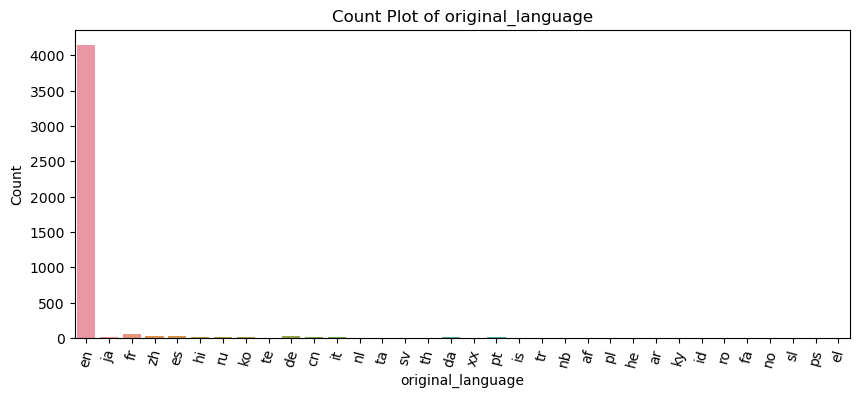

In [37]:
count('original_language')

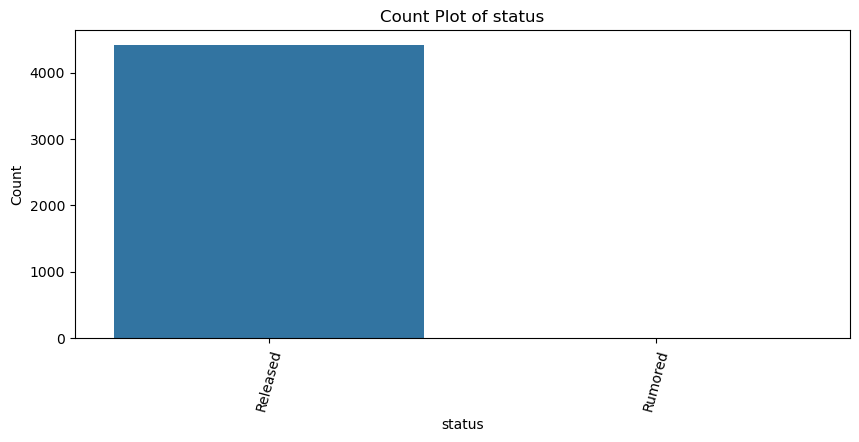

In [38]:
count('status')

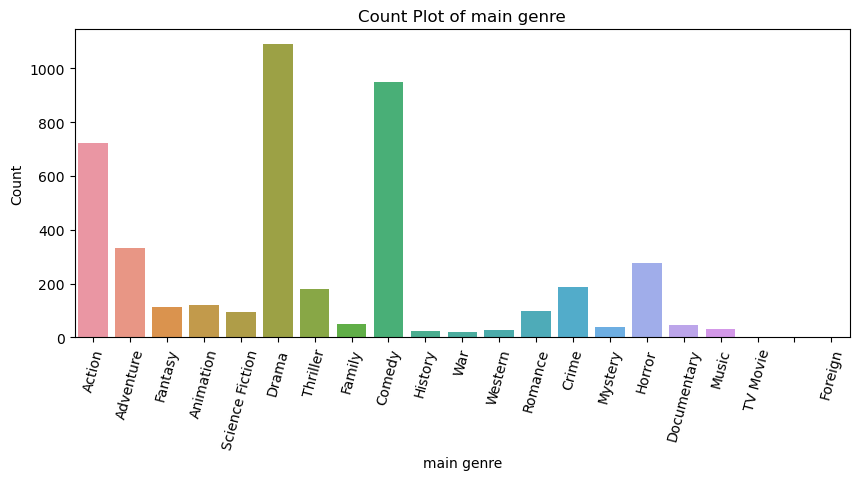

In [39]:
count('main genre')

In [40]:
movie_df['main genre'].value_counts()

Drama              1090
Comedy              949
Action              723
Adventure           334
Horror              278
Crime               188
Thriller            180
Animation           119
Fantasy             115
Romance             100
Science Fiction      94
Family               50
Documentary          48
Mystery              40
Music                33
Western              27
History              23
War                  22
TV Movie              3
                      2
Foreign               1
Name: main genre, dtype: int64

In [41]:
def num_plot(col):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Histogram
    axes[0].hist(movie_df[col].dropna(), bins=20, edgecolor='black')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f'Histogram of {col}')

    # Boxplot
    sns.boxplot(data=movie_df, y=col, ax=axes[1])
    axes[1].set_ylabel(col)
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

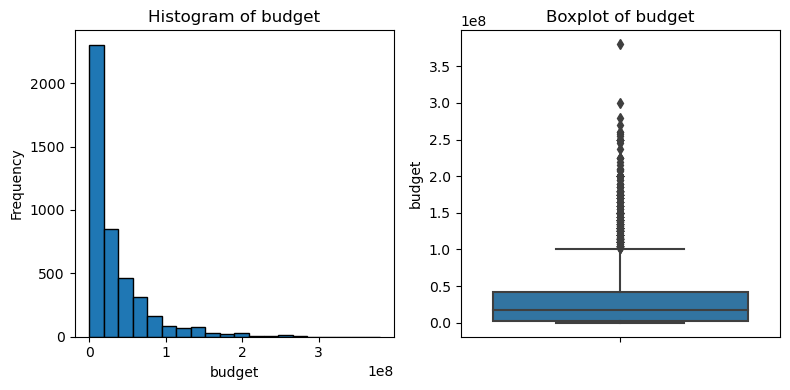

In [42]:
num_plot('budget')

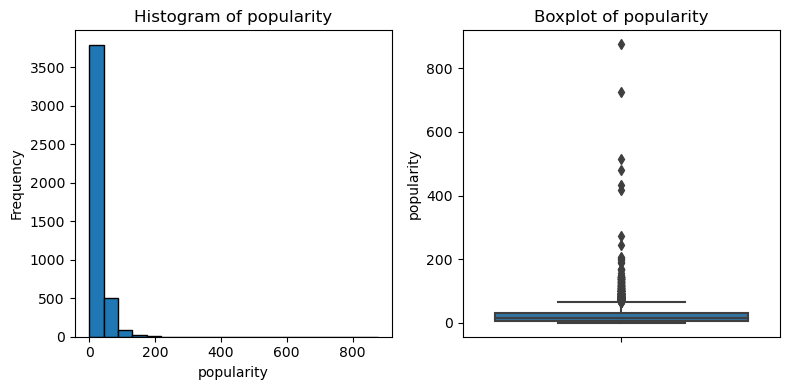

In [43]:
num_plot('popularity')

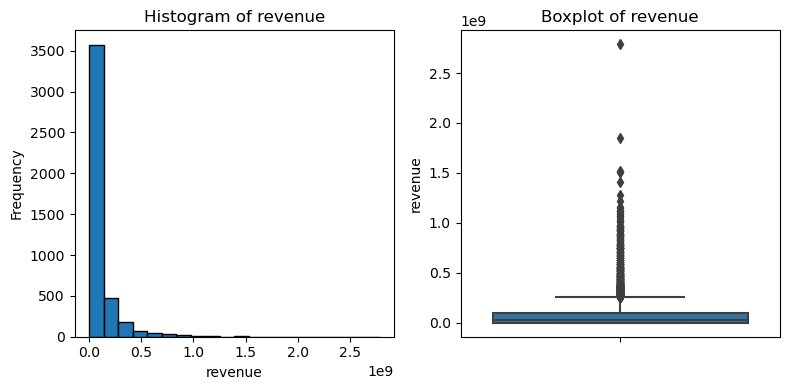

In [44]:
num_plot('revenue')

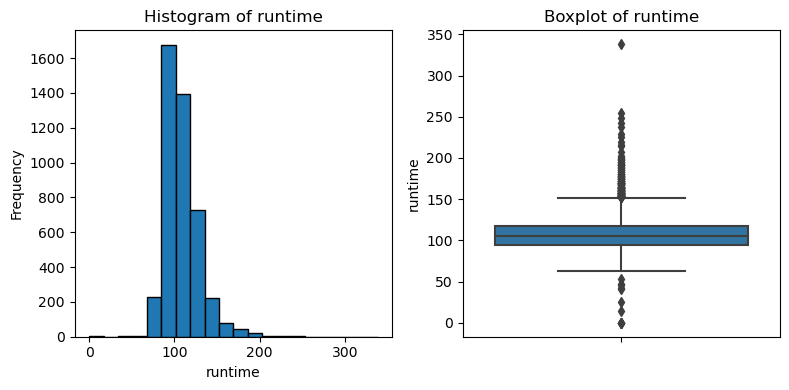

In [45]:
num_plot('runtime')

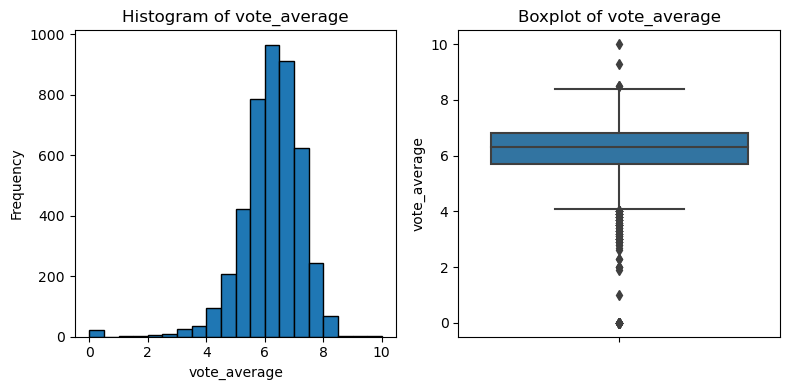

In [46]:
num_plot('vote_average')

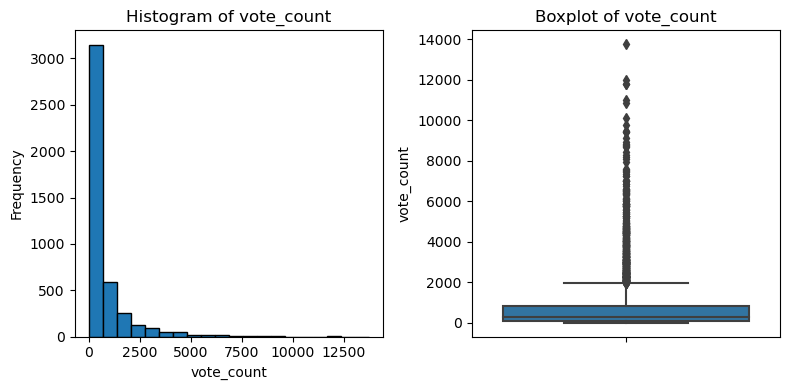

In [47]:
num_plot('vote_count')

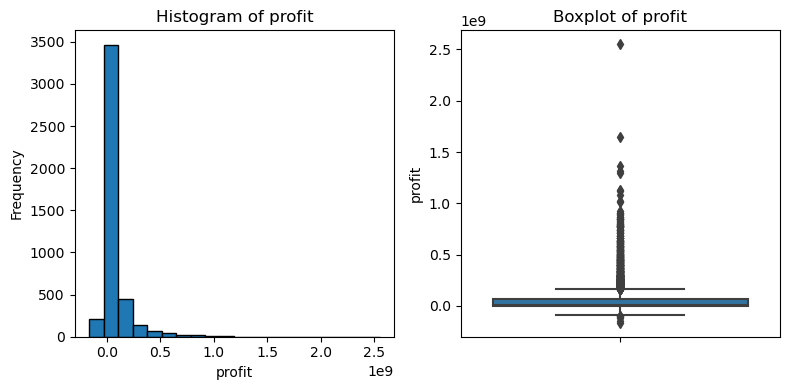

In [48]:
num_plot('profit')

<AxesSubplot:ylabel='Frequency'>

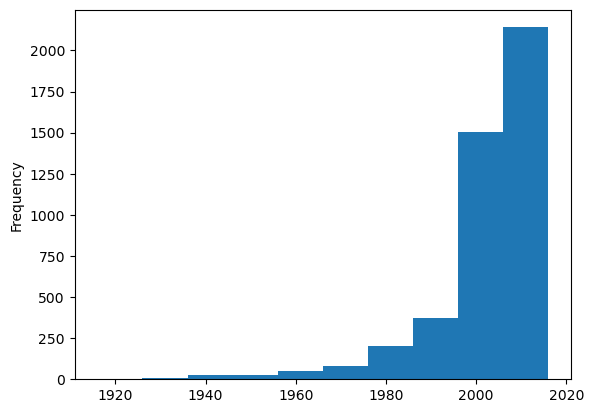

In [49]:
movie_df.release_year.plot(kind='hist',x="release_year",y="Distrbution")

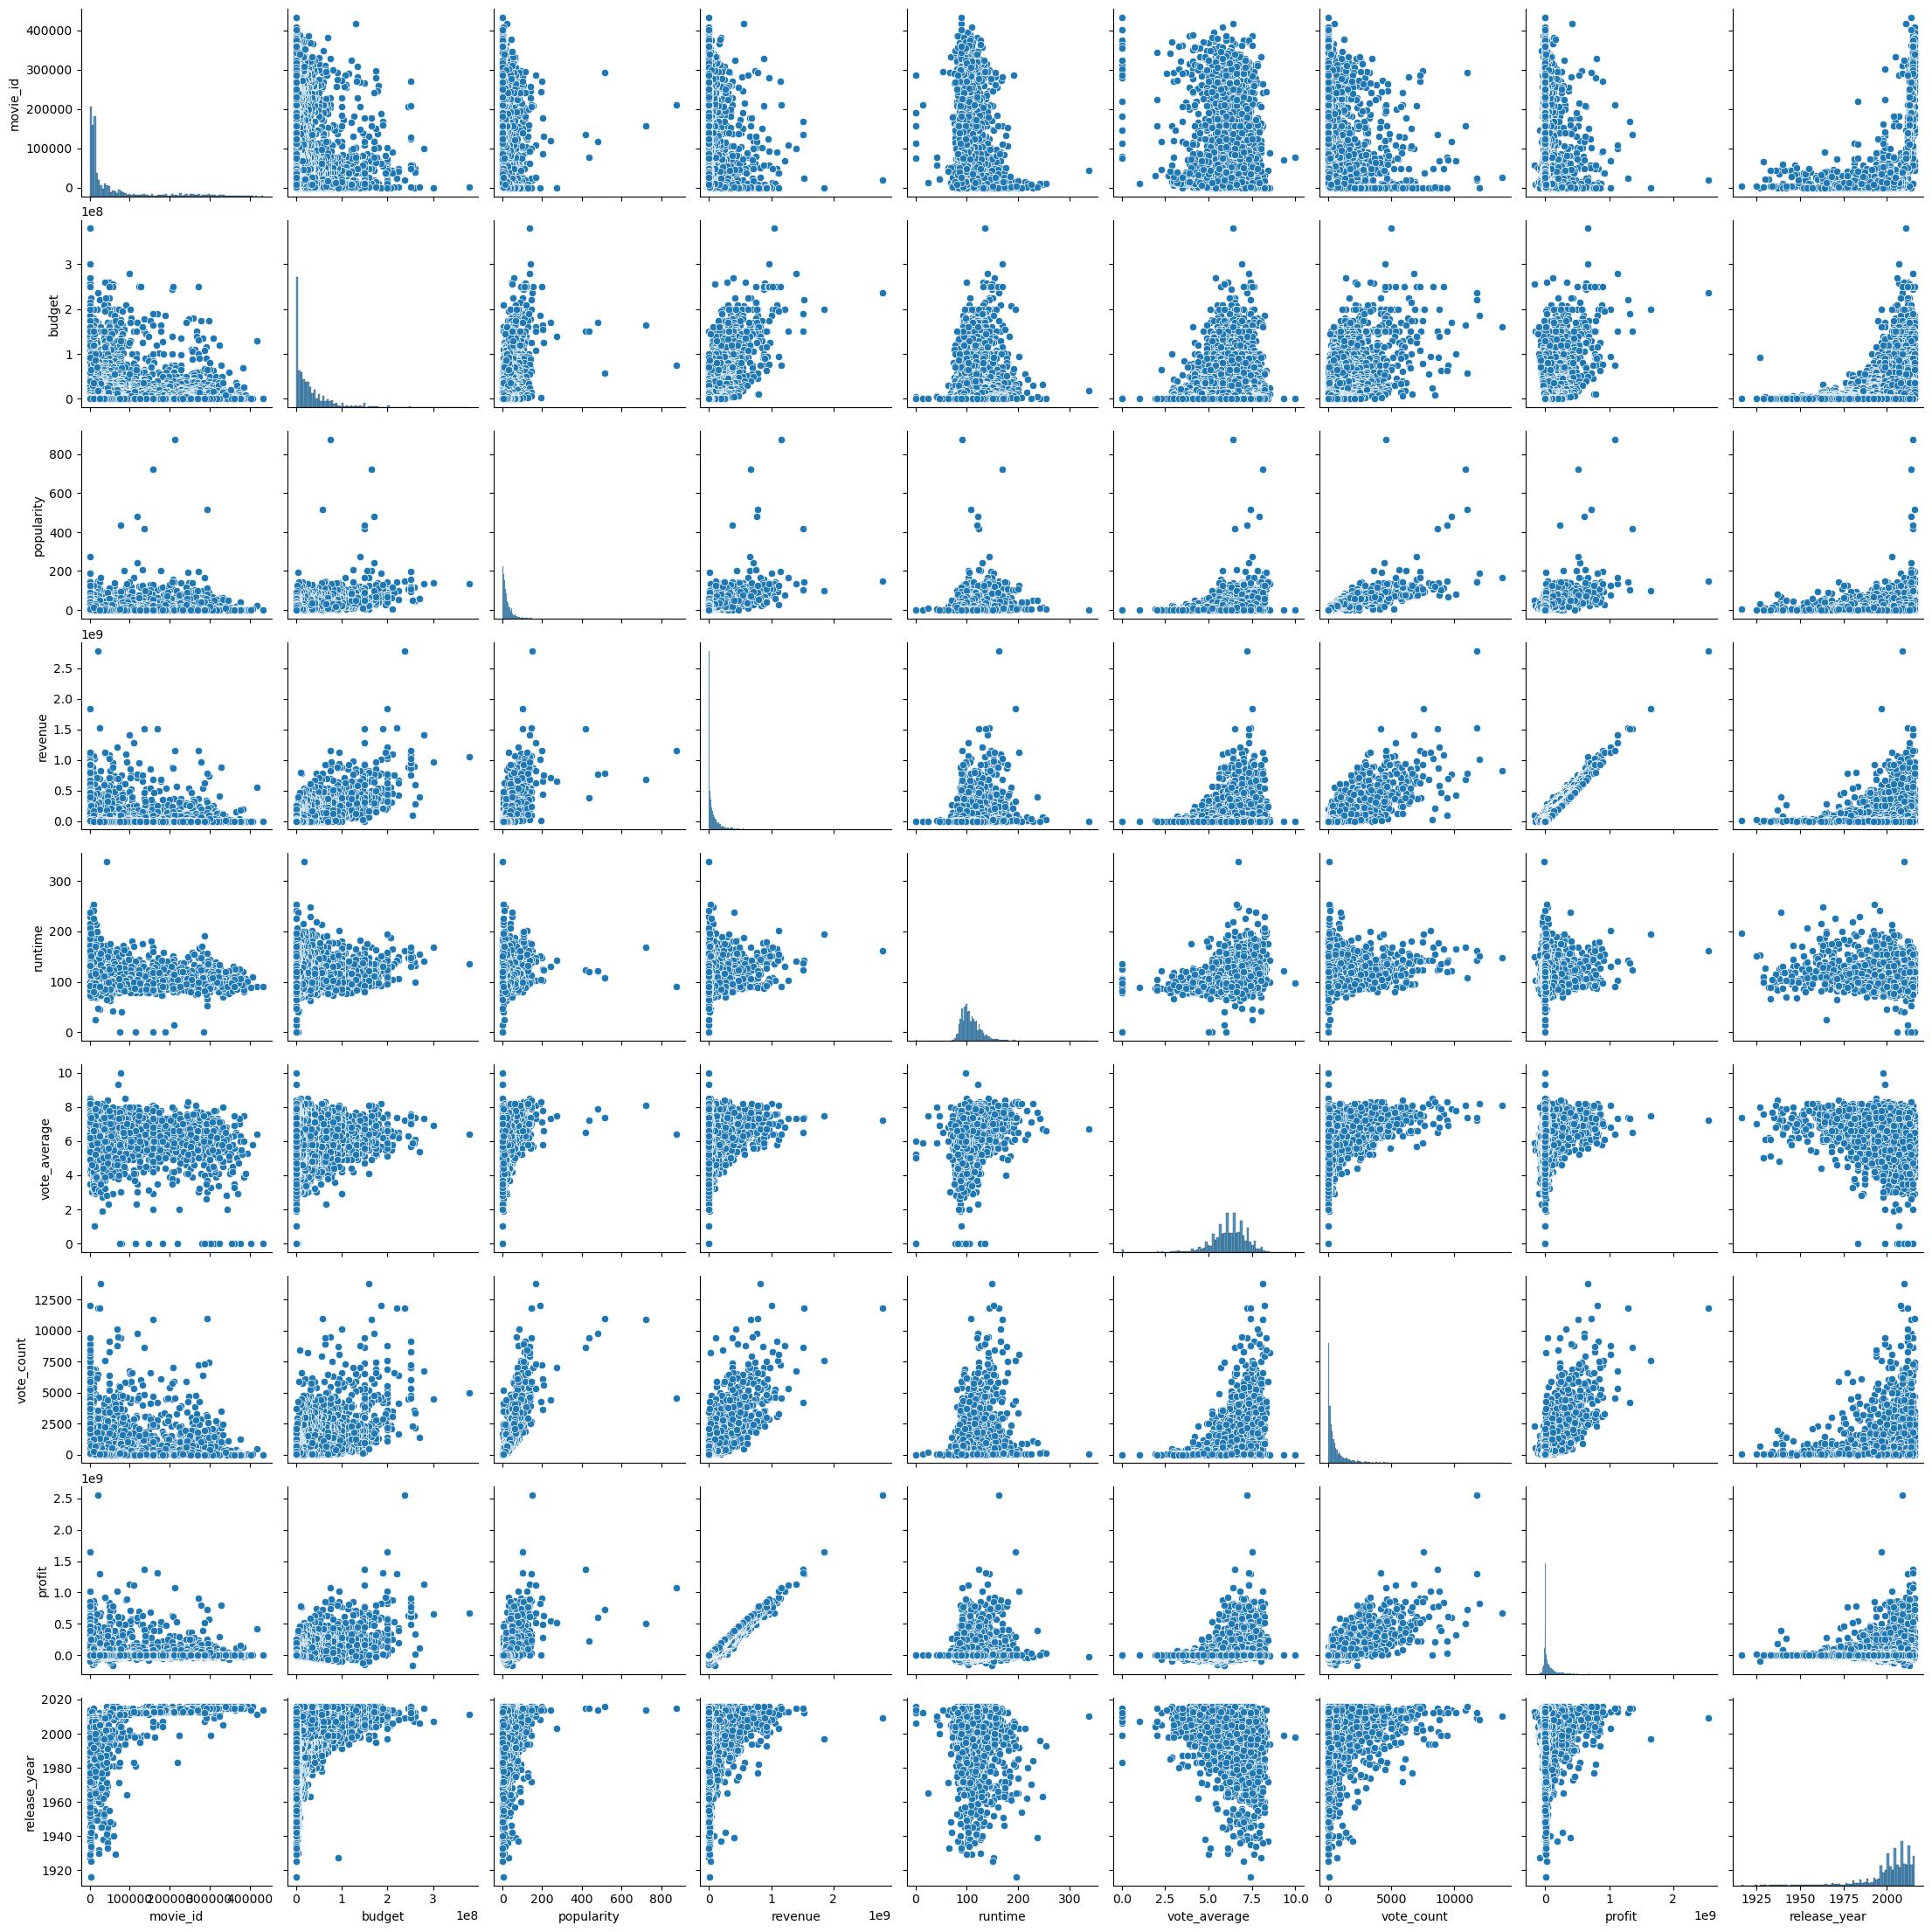

In [50]:
sns.pairplot(movie_df)

In [51]:
movie_df.shape

(4419, 20)

In [52]:
movie_df.describe()

,movie_id,budget,popularity,revenue,runtime,vote_average,vote_count,profit,release_year
count,4419.000000,4.419000e+03,4419.000000,4.419000e+03,4419.000000,4419.000000,4419.000000,4.419000e+03,4419.000000
mean,52942.126273,3.144989e+07,23.219085,8.933932e+07,108.271390,6.180810,748.689296,5.788942e+07,2002.181942
std,84762.180695,4.155871e+07,32.594522,1.679270e+08,20.920031,1.019384,1270.337787,1.407760e+08,12.704067
min,5.000000,0.000000e+00,0.001586,0.000000e+00,0.000000,0.000000,0.000000,-1.657101e+08,1916.000000
25%,8478.500000,2.600000e+06,6.249772,1.050000e+01,95.000000,5.700000,80.000000,-1.298568e+06,1999.000000
50%,13483.000000,1.700000e+07,14.752587,2.583662e+07,105.000000,6.300000,285.000000,6.361217e+06,2005.000000
75%,50646.500000,4.200000e+07,30.030585,1.016357e+08,118.000000,6.800000,826.000000,6.309199e+07,2010.000000
max,433715.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2.550965e+09,2016.000000


In [53]:
#Treating the data with zero values and outliers.

In [54]:
budget_25 = np.percentile(movie_df['budget'], 25)
movie_df.loc[movie_df['budget'] < budget_25, 'budget'] =budget_25

In [55]:
revenue_25 = np.percentile(movie_df['revenue'], 25)
movie_df.loc[movie_df['revenue'] < revenue_25, 'revenue'] =budget_25

In [56]:
movie_df.loc[movie_df['vote_average'] ==0 , 'vote_average'] = movie_df['vote_average'].mean()
movie_df.loc[movie_df['vote_count'] ==0 , 'vote_count'] = movie_df['vote_count'].mean()

In [57]:
movie_df.loc[movie_df['runtime'] ==0 , 'runtime'] = movie_df['runtime'].mean()

In [58]:
movie_df.to_csv('C:/Users/saran/OneDrive/Documents/TMDB_movies_capstone.csv')    ## exporting as csv file

In [59]:
movie_df = movie_df[movie_df['main genre'] != '']

In [60]:
movie_df.describe()  # rechecking

,movie_id,budget,popularity,revenue,runtime,vote_average,vote_count,profit,release_year
count,4417.000000,4.417000e+03,4417.000000,4.417000e+03,4417.000000,4417.000000,4417.000000,4.417000e+03,4417.000000
mean,52845.222549,3.202622e+07,23.229486,9.002903e+07,108.399735,6.210350,752.417882,5.791564e+07,2002.176138
std,84636.800384,4.114985e+07,32.598235,1.676121e+08,20.602841,0.925725,1269.520859,1.408025e+08,12.704014
min,5.000000,2.600000e+06,0.001586,1.100000e+01,14.000000,1.000000,1.000000,-1.657101e+08,1916.000000
25%,8470.000000,2.600000e+06,6.271410,2.600000e+06,95.000000,5.700000,82.000000,-1.300000e+06,1999.000000
50%,13476.000000,1.700000e+07,14.754281,2.587183e+07,105.000000,6.300000,290.000000,6.442528e+06,2005.000000
75%,50620.000000,4.200000e+07,30.058263,1.016466e+08,118.000000,6.800000,826.000000,6.310764e+07,2010.000000
max,433715.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2.550965e+09,2016.000000


## Bivariate and multivariate Analysis

-------------------------------------------------------------------------------------------------------------------------------

#### Which genres  have the most number of movies?

In [61]:
genre_df = movie_df.groupby('main genre').size().reset_index(name='count').sort_values('count', ascending=False)

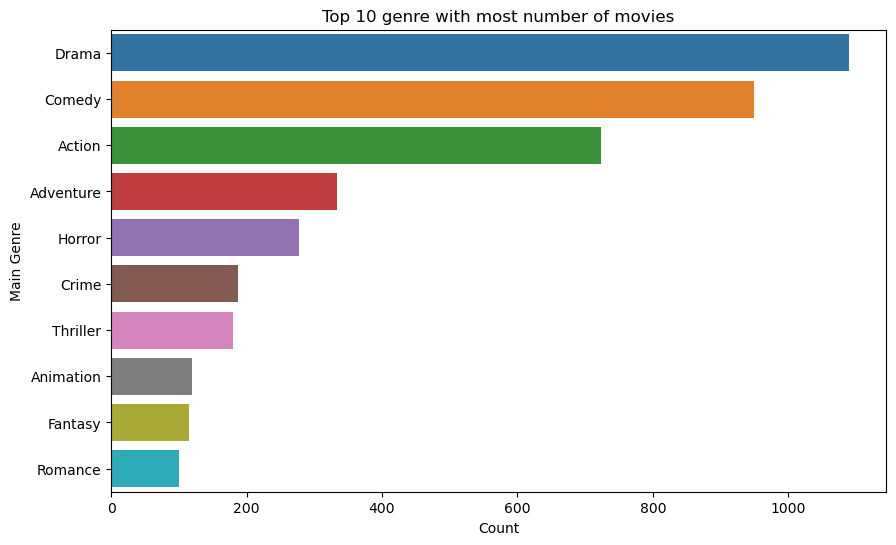

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(y='main genre', x='count', data=genre_df.head(10),orient='h')
plt.title('Top 10 genre with most number of movies')
plt.ylabel('Main Genre')
plt.xlabel('Count')
plt.show()

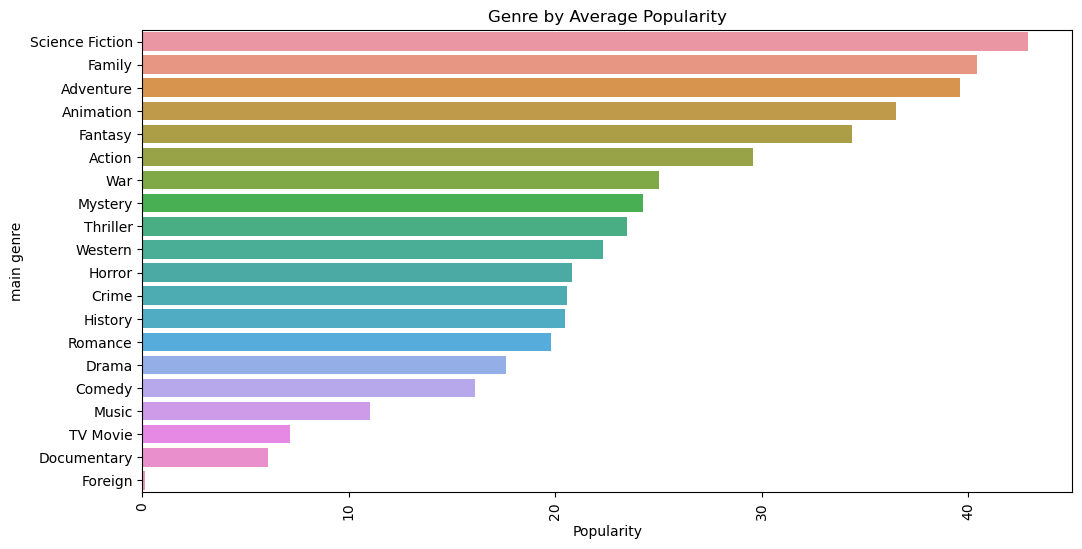

In [63]:
avg_popularity_by_genre = movie_df.groupby('main genre')['popularity'].mean().reset_index()
sorted_genres = avg_popularity_by_genre.sort_values('popularity', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(y=sorted_genres['main genre'], x=sorted_genres['popularity'], orient='h')
plt.xticks(rotation=90)
plt.xlabel('Popularity')
plt.title('Genre by Average Popularity')
plt.show()

#### What are the top 10 Movies based on their popularity?

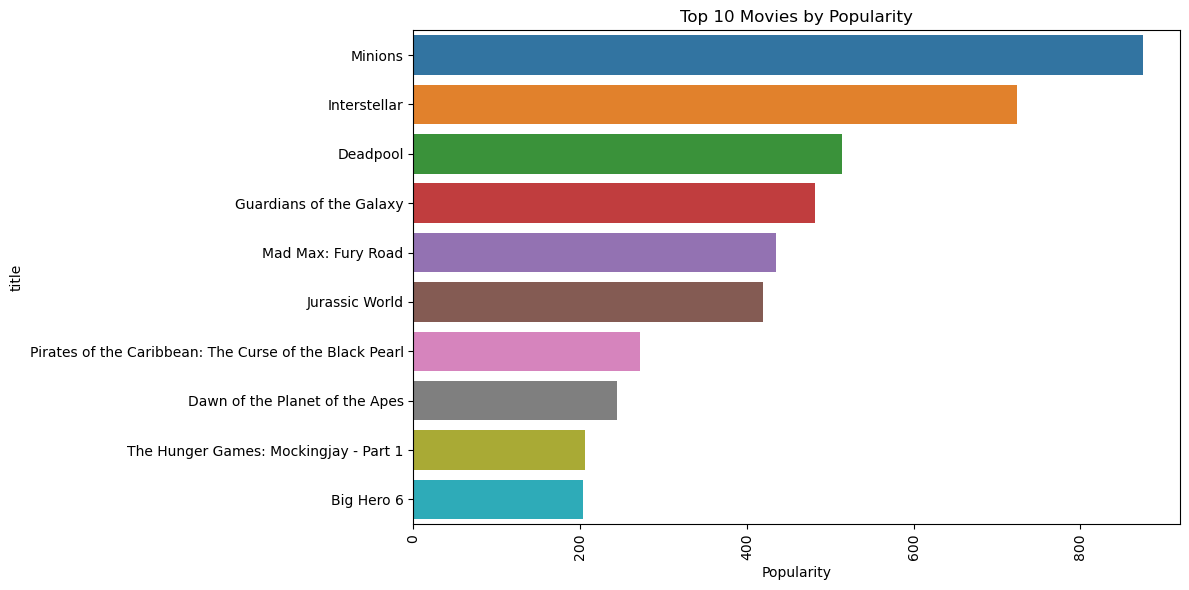

In [64]:
top_mov = movie_df.nlargest(10,'popularity')

plt.figure(figsize=(12, 6))
sns.barplot(y=top_mov['title'], x=top_mov['popularity'],orient='h')
plt.xticks(rotation=90)
plt.xlabel('Popularity')
plt.title('Top 10 Movies by Popularity')
plt.tight_layout()
plt.show()

##### what are the Top 10 movies by budget?

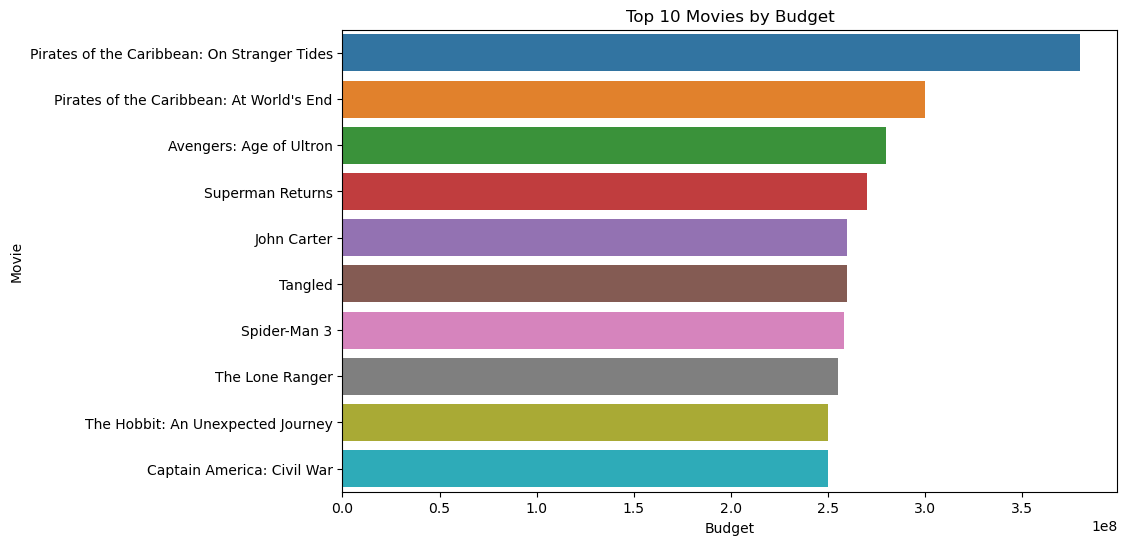

In [65]:
top_budget = movie_df.sort_values('budget', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_budget['title'], x=top_budget['budget'],orient='h')
plt.xlabel('Budget')
plt.ylabel('Movie')
plt.title('Top 10 Movies by Budget')
plt.show()

##### What are the top 0 movies by revenue?

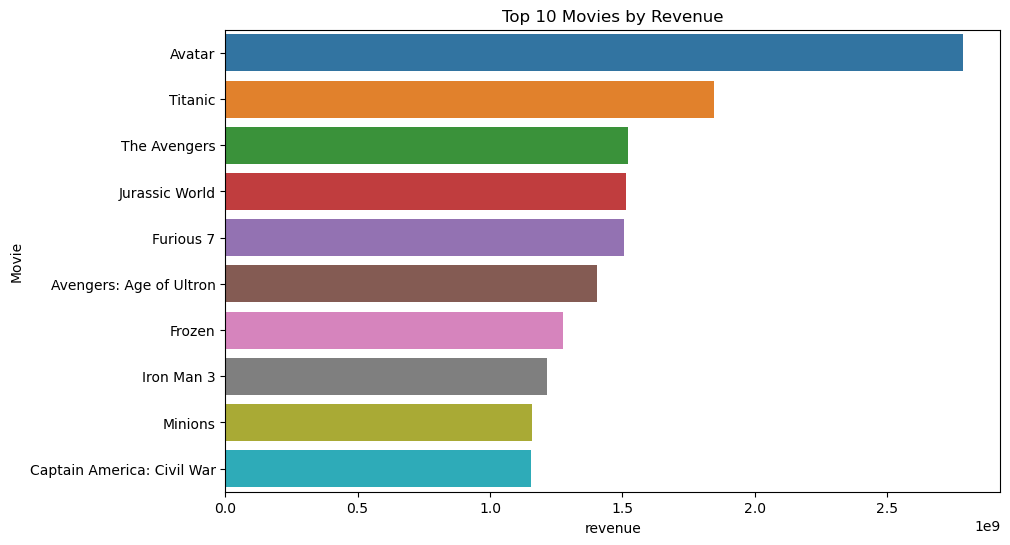

In [66]:
top_rev = movie_df.sort_values('revenue', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_rev['title'], x=top_rev['revenue'],orient='h')
plt.xlabel('revenue')
plt.ylabel('Movie')
plt.title('Top 10 Movies by Revenue')
plt.show()

#### Who are the top 10 directors with most number of movies

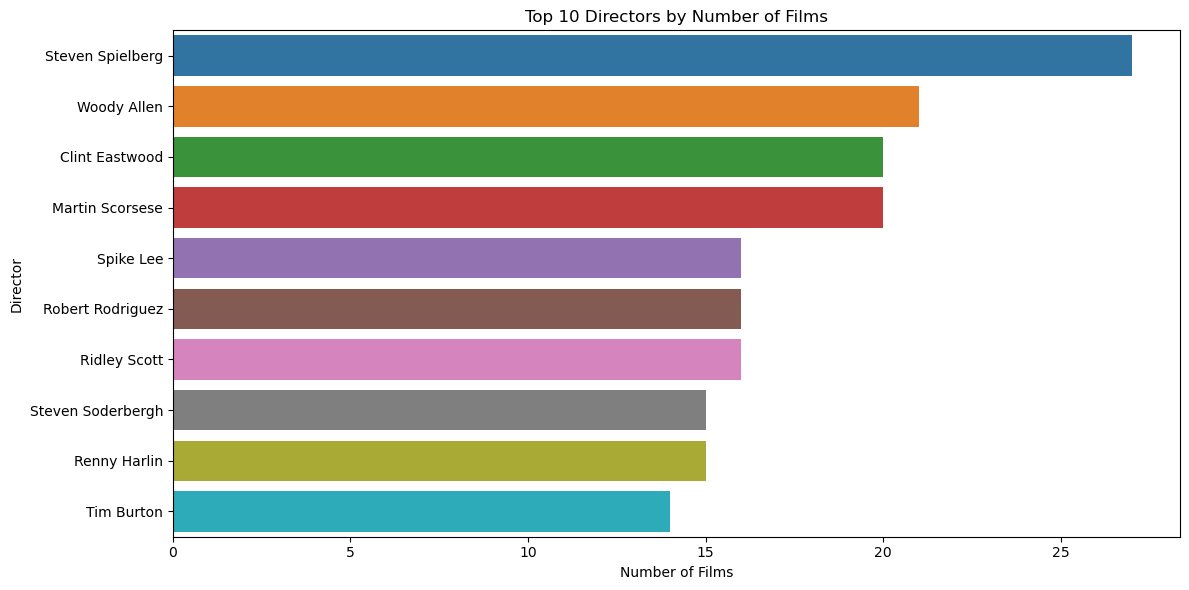

In [67]:
director_df = movie_df.groupby('director').size().reset_index(name='count').sort_values('count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(y='director', x='count', orient='h',data=director_df.head(10))
plt.xlabel('Number of Films')
plt.ylabel('Director')
plt.title('Top 10 Directors by Number of Films')
plt.tight_layout()
plt.show()

#### What is the average runtime for different genre

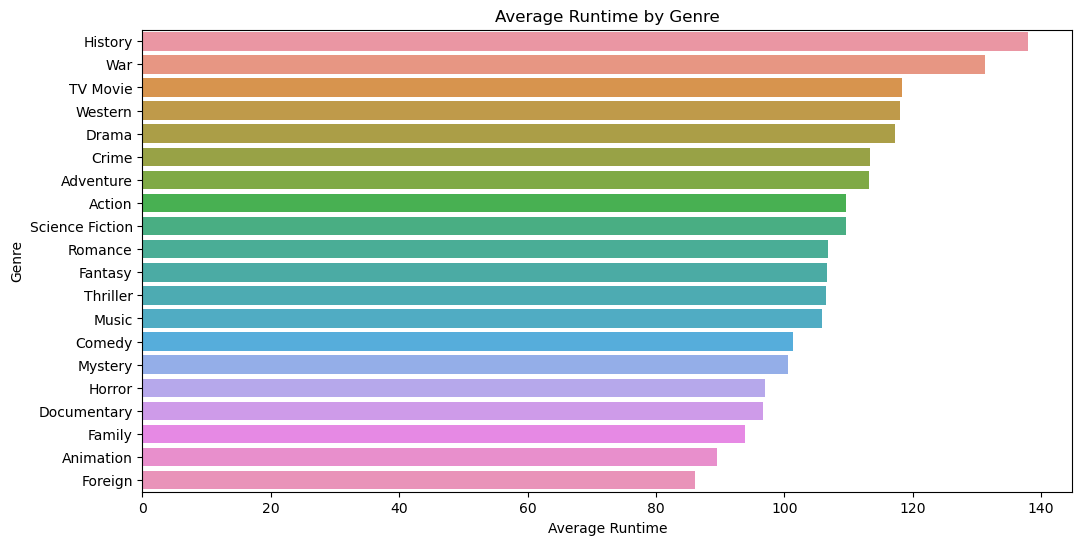

In [68]:
avg_runtime = movie_df.groupby('main genre')['runtime'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(y=avg_runtime.index, x=avg_runtime.values,orient='h')
plt.ylabel('Genre')
plt.xlabel('Average Runtime')
plt.title('Average Runtime by Genre')
plt.show()

##### What are the top 3 production companies by profit?

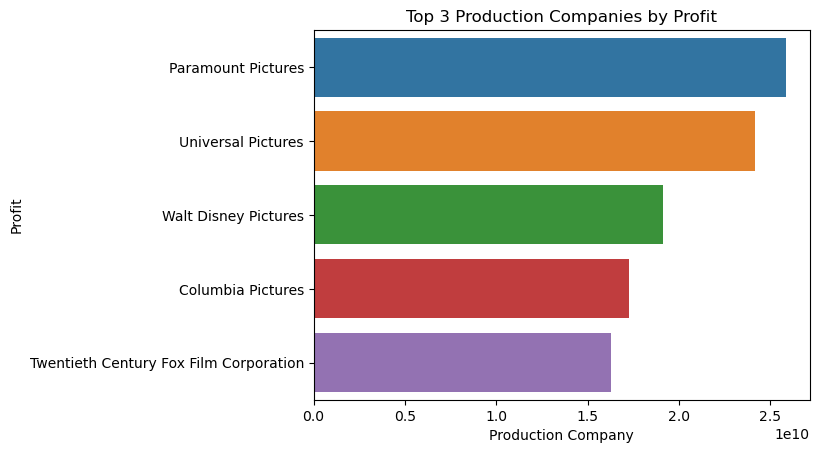

In [69]:
prod_company = movie_df.groupby('production_companies')['profit'].sum()
sorted_profit = prod_company.sort_values(ascending=False)
top3_prod_companies = sorted_profit.head()

sns.barplot(y=top3_prod_companies.index,x= top3_prod_companies.values,orient='h')
plt.title('Top 3 Production Companies by Profit')
plt.xlabel('Production Company')
plt.ylabel('Profit')
plt.show()

#### Is the budget of the movie and its popularity related?


Text(0.5, 1.0, 'Relationship between Popularity and Budget')

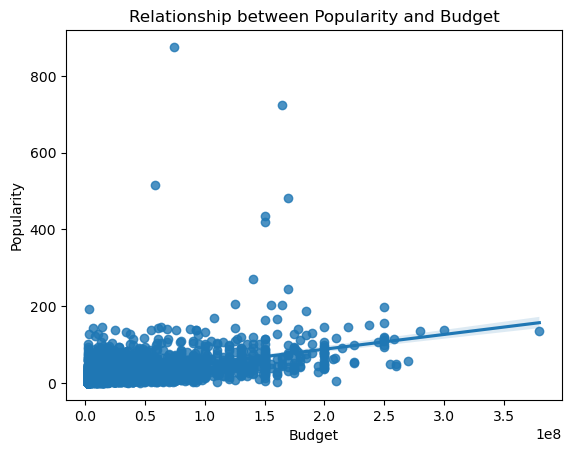

In [70]:
sns.regplot(x='budget', y='popularity', data=movie_df)
plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.title('Relationship between Popularity and Budget')

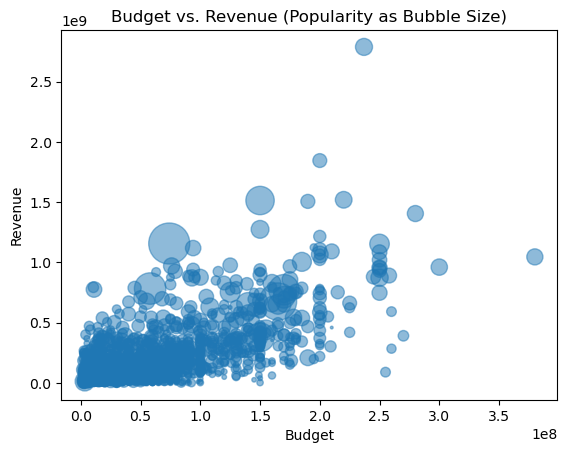

In [71]:
plt.scatter(movie_df['budget'], movie_df['revenue'], s=movie_df['popularity']*1, alpha=0.5)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs. Revenue (Popularity as Bubble Size)')
plt.show()

#### Is there an increase in number of movies of all genres over the years?

<Figure size 1200x800 with 0 Axes>

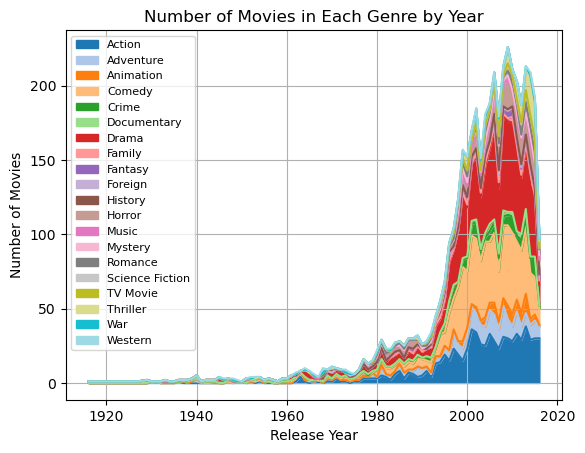

In [72]:
genre_counts = movie_df.groupby(['release_year', 'main genre']).size().unstack()

plt.figure(figsize=(12, 8))
genre_counts.plot(kind='area', stacked=True, cmap='tab20')
plt.title('Number of Movies in Each Genre by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(prop={'size': 8})
plt.grid(True)
plt.show()

##### Which genres have ahigher range of revenue?

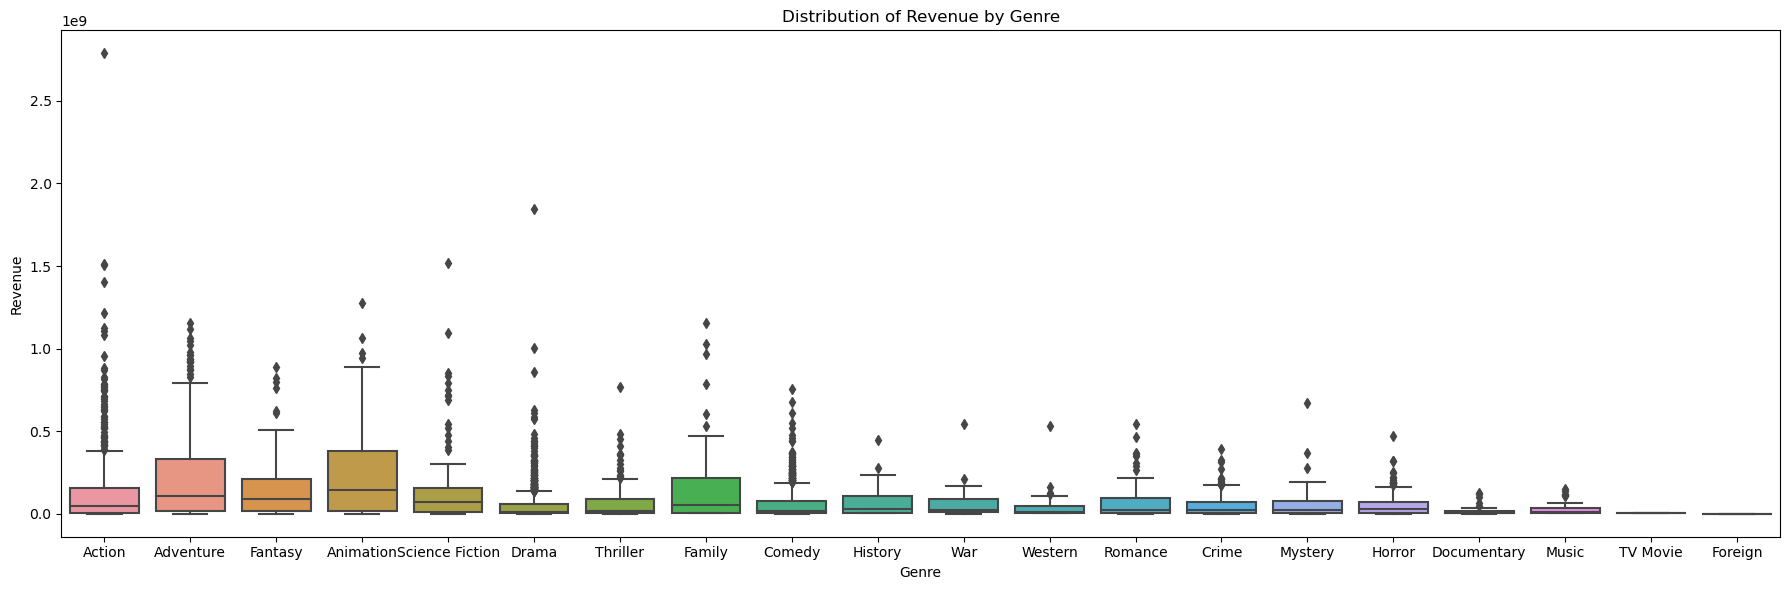

In [73]:
m5 = movie_df[movie_df['main genre'].isin(['Action', 'Adventure', 'Comedy'])]


plt.figure(figsize=(18, 6))
sns.boxplot(x='main genre', y='revenue', data=movie_df)
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.title('Distribution of Revenue by Genre')
plt.tight_layout()
plt.show()

##### How are the different columns related to each other

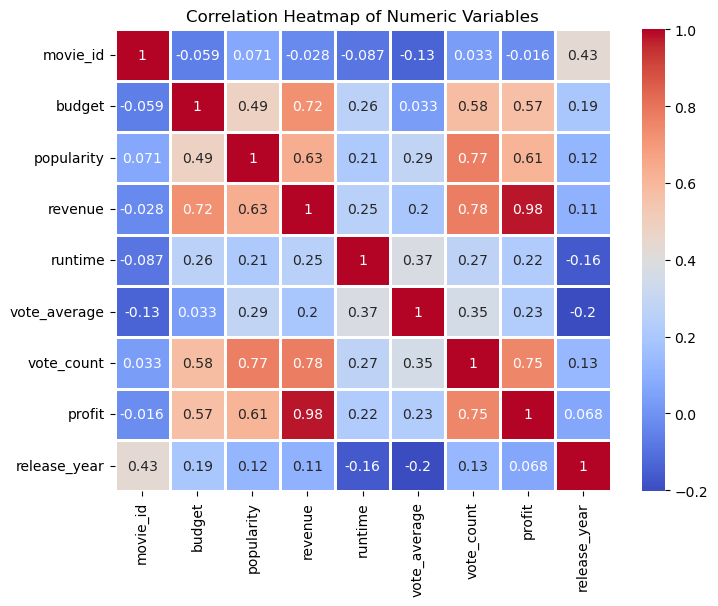

In [74]:
corr_matrix = movie_df[continuous].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',linecolor='white',linewidth=2)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

#### Multivariate

##### What are the top 10 movies with run time greater than average run time?

In [75]:
cond1 = movie_df['runtime'] > movie_df['runtime'].mean()
m1 = movie_df[cond1].sort_values(by='runtime', ascending=False)
m1=m1[['movie_id','title','main genre','runtime']]
m1.head()

,movie_id,title,main genre,runtime
2384,43434,Carlos,Crime,338.0
1922,10655,Gettysburg,War,254.0
1125,8095,Cleopatra,Drama,248.0
2373,10549,Hamlet,Drama,242.0
3813,770,Gone with the Wind,Drama,238.0


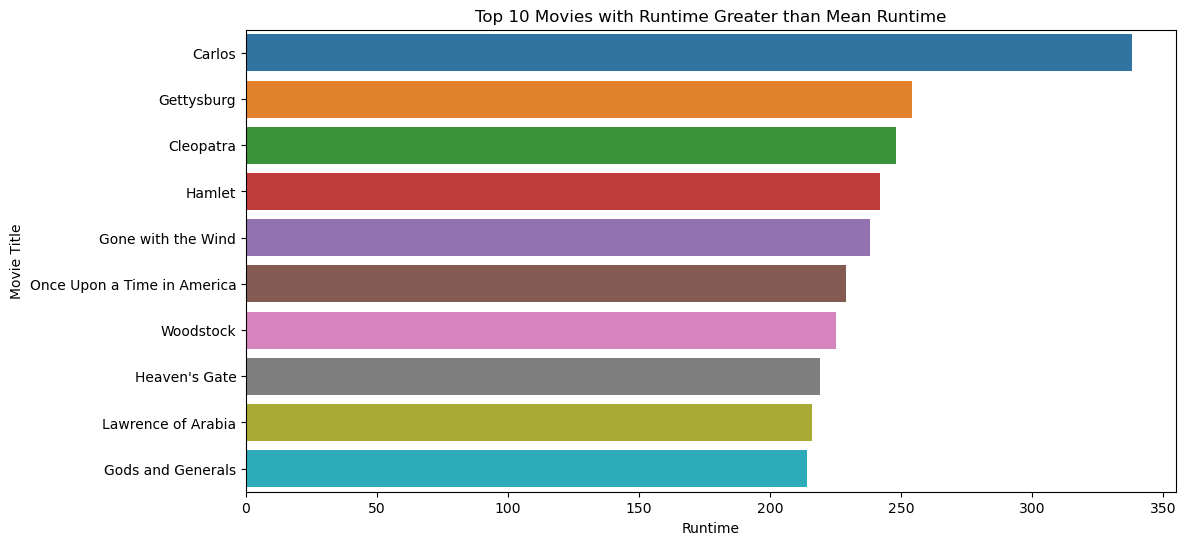

In [76]:
plt.figure(figsize=(12, 6))
sns.barplot(data=m1.head(10), y='title', x='runtime')
plt.ylabel('Movie Title')
plt.xlabel('Runtime')
plt.title('Top 10 Movies with Runtime Greater than Mean Runtime')
plt.show()

In [77]:
movie_df['main genre'].value_counts()

Drama              1090
Comedy              949
Action              723
Adventure           334
Horror              278
Crime               188
Thriller            180
Animation           119
Fantasy             115
Romance             100
Science Fiction      94
Family               50
Documentary          48
Mystery              40
Music                33
Western              27
History              23
War                  22
TV Movie              3
Foreign               1
Name: main genre, dtype: int64

##### Titles of action movies directed by Christopher nolan andwhich is the most popular?

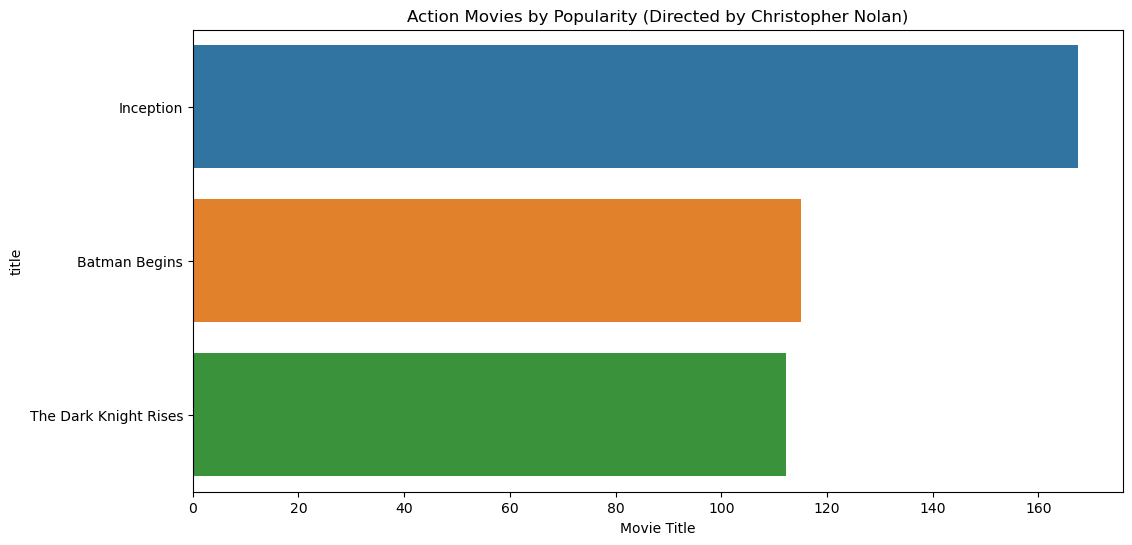

In [78]:
cond3= (movie_df['main genre'] == 'Action') & (movie_df['director'] == 'Christopher Nolan')
m3=movie_df[cond3].sort_values('popularity', ascending=False)



plt.figure(figsize=(12, 6))
sns.barplot(x='popularity', y='title', data=m3)
plt.xlabel('Popularity')
plt.xlabel('Movie Title')
plt.title('Action Movies by Popularity (Directed by Christopher Nolan)')
plt.show()

##### Top 10 movies belonging to Adventure genre with a budget greatee than $10M

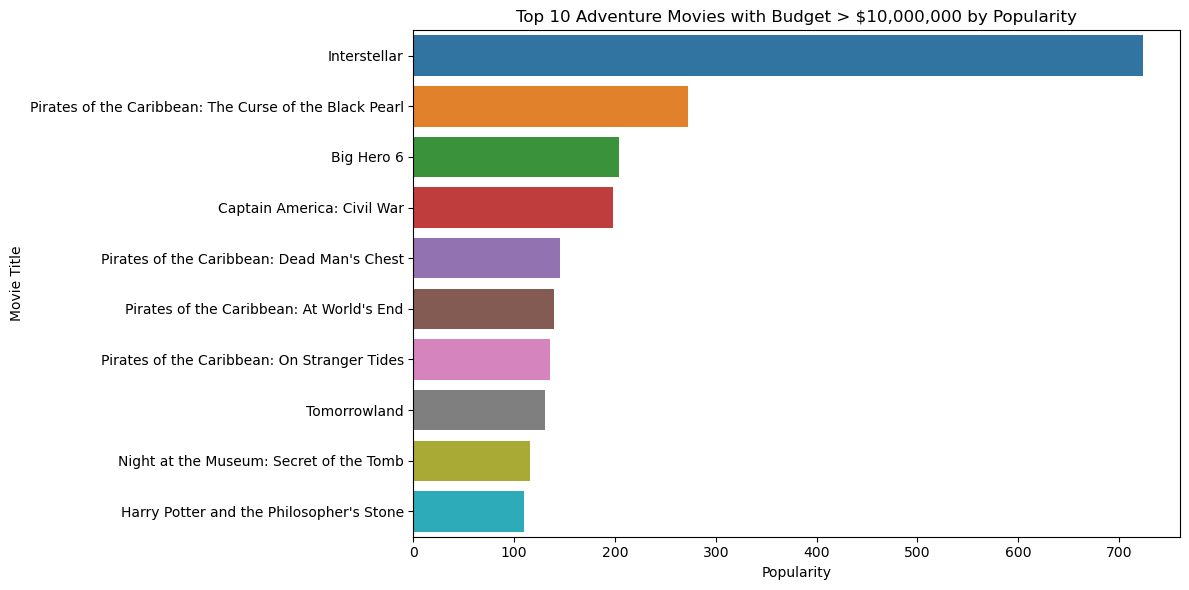

In [79]:
cond4 = (movie_df['main genre'] == 'Adventure') & (movie_df['budget'] > 100000000)
m4 = movie_df[cond4].sort_values('popularity', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x='popularity', y='title', data=m4.head(10))
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.title('Top 10 Adventure Movies with Budget > $10,000,000 by Popularity')
plt.tight_layout()
plt.show()

##### How is the disteibution of revenue for action .adventure and comedy genre?

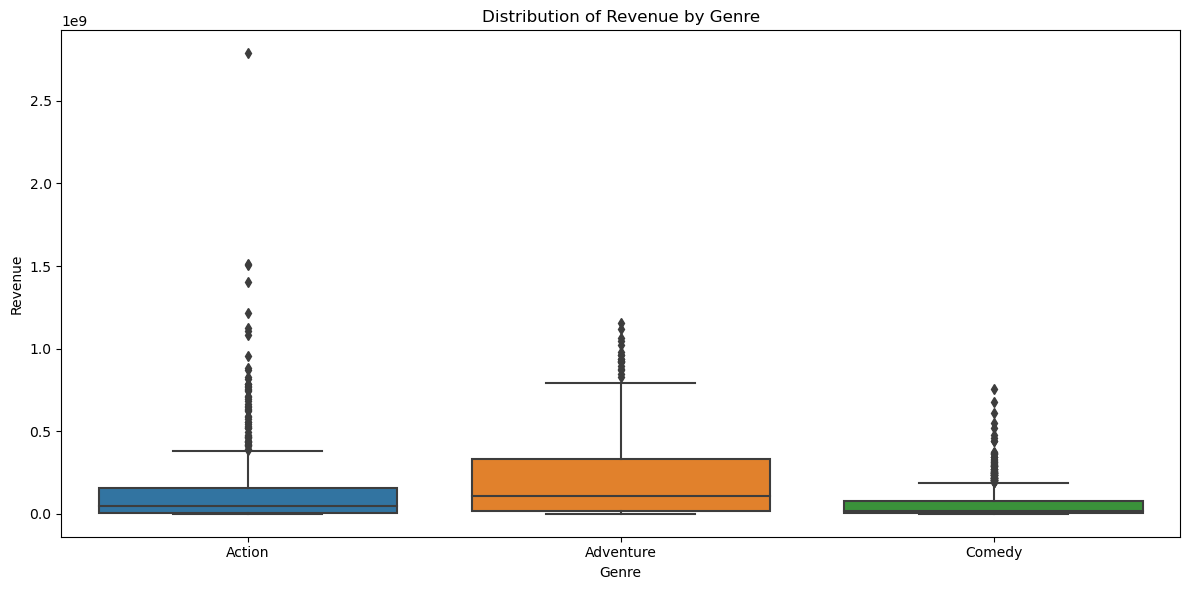

In [80]:
m5 = movie_df[movie_df['main genre'].isin(['Action', 'Adventure', 'Comedy'])]


plt.figure(figsize=(12, 6))
sns.boxplot(x='main genre', y='revenue', data=m5)
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.title('Distribution of Revenue by Genre')
plt.tight_layout()
plt.show()

### Inference

###### -- Most films in the datasset are of 'English' language.
###### -- Science fiction is the most popular genre, while drama genre has the highest number of movies.
###### -- The movies belonging to history genre have the longest average runtime but the movie Carlos of crime genre is the movie with    longest  runtime in datset.
###### -- Minions is the most popular movie followed by interstellar.
###### -- The movie "Pirrates of carribean: Stranger tides" hhas the highest budget, while "Avatar" has the highest revenue.
###### -- The director steven spielberg has the highest number of movies.
###### -- The movie 'Inception' is the most popular action movie directed by Christopher Nolan.
###### -- "interstellar" is the most popular among adventure movies with budget over  10 million dollars.

###### --The biudget of the film and popularity have a weak correlation , while the budget and revenue seem to have a strong correlation.
###### -- there is also a strong correlation between the popularity of a movie and its revenue.